# Finite differences

Let's compute forward- and center-difference approximations for the first derivative $f'(x)$ of the function $f(x) = \sin(x)$.   In particular, we'll compute $f'(1)$ compared to the exact result $\cos(1)$ as a function of the step size $\Delta x$.

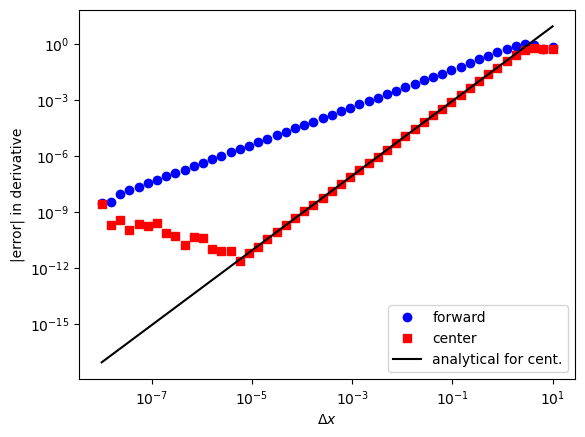

PyObject <matplotlib.legend.Legend object at 0x7fb27e6d5370>

In [1]:
x = 1
Δx = exp10.(range(-8, 1, length=50))            # 50 logarithmically spaced points from 0.00000001 to 10 (type Δx via \Delta<TAB>x)
f = (sin.(x .+ Δx) .- sin.(x)) ./ Δx            # forward difference ... note that ./ means element-wise division
c = (sin.(x .+ Δx) .- sin.(x .- Δx)) ./ (2Δx)   # center difference

using PyPlot
loglog(Δx, abs.(cos(x) .- f), "bo")
loglog(Δx, abs.(cos(x) .- c), "rs")
loglog(Δx, Δx.^2 * cos(x)/6, "k-")              # plot center-difference error estimate from Taylor expansion
xlabel(L"$\Delta x$")
ylabel("|error| in derivative")
legend(["forward", "center", "analytical for cent."], loc="lower right")

# Finite-difference Laplacian

As in class, we apply the center-difference approximation twice to approximate $\hat{A} = \frac{\partial^2}{\partial x^2}$ by a matrix $A$ on $N$ equally spaced points on $x \in [0,L]$, for functions $u(x)$ with Dirichlet boundary conditions $u(0) = u(L) = 0$.

(The `diagm(n => v)` command in Julia takes a vector `v` and makes a square matrix with `v` on the `n`-th diagonal.)

In [1]:
using LinearAlgebra
N = 200
L = 1
Δx = L / (N+1)
A = (-2*diagm(0 => ones(N)) + diagm(1 => ones(N-1)) + diagm(-1 => ones(N-1))) / (Δx)^2

200×200 Array{Float64,2}:
 -80802.0   40401.0       0.0       0.0  …       0.0       0.0       0.0
  40401.0  -80802.0   40401.0       0.0          0.0       0.0       0.0
      0.0   40401.0  -80802.0   40401.0          0.0       0.0       0.0
      0.0       0.0   40401.0  -80802.0          0.0       0.0       0.0
      0.0       0.0       0.0   40401.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0  …       0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0  …       0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      ⋮                  

We'll use the `eigen` command to compute the eigenvalues `λ` (typed as `\lambda` followed by tab) and the eigenvectors `X` (`X` is a matrix whose columns are the eigenvectors.)

In [2]:
system = eigen(A)
λ = system.values 
X = system.vectors

200×200 Array{Float64,2}:
  0.00155903  -0.00311767   0.00467555  …  -0.00311767  0.00155903
 -0.00311767   0.00623229  -0.00934083     -0.00623229  0.00311767
  0.00467555  -0.00934083   0.0139856      -0.00934083  0.00467555
 -0.00623229   0.0124402   -0.0185996      -0.0124402   0.00623229
  0.00778751  -0.0155275    0.0231727      -0.0155275   0.00778751
 -0.00934083   0.0185996   -0.0276948   …  -0.0185996   0.00934083
  0.0108919   -0.0216535    0.0321561      -0.0216535   0.0108919 
 -0.0124402    0.0246862   -0.0365468      -0.0246862   0.0124402 
  0.0139856   -0.0276948    0.040857       -0.0276948   0.0139856 
 -0.0155275    0.0306764   -0.0450775      -0.0306764   0.0155275 
  0.0170656   -0.033628     0.0491988   …  -0.033628    0.0170656 
 -0.0185996    0.0365468   -0.0532121      -0.0365468   0.0185996 
  0.020129    -0.0394298    0.0571083      -0.0394298   0.020129  
  ⋮                                     ⋱                         
  0.0185996    0.0365468    0.053212

The eigenvalues are all negative and are sorted in increasing order, so that the eigenvalues of smallest magnitude are *last*.  `reverse(λ, 1)` reverses the order, so that the smallest-magnitude eigenvalues are *first*.   We then take the first five of these eigenvalues (`1:5` denotes the indices `1,2,3,4,5`) and compare them to the exact eigenvalues $-(n\pi/L)^2$ of $\partial^2/\partial x^2$:

In [3]:
(reverse(λ, 1)[1:5] - -((1:5) * π / L).^2) ./ (reverse(λ,1)[1:5])

5-element Array{Float64,1}:
 -2.0357839645776876e-5 
 -8.143434264464294e-5  
 -0.00018323846200250438
 -0.0003257851223301152 
 -0.0005090952241369668 

If we go back and double $N$ (halving $\Delta x$), we'll find that the error becomes smaller by roughly a factor of 4, just as we would expect from the second-order convergence of the center-difference approximation we used.

Notice that the fractional error (the difference divided by $\lambda$) in the eigenvalue *increases* with increasing $n$.  The reason is that larger-$n$ eigenfunctions are more oscillatory, and the same $\Delta x$ gives a worse approximation for the derivative if the function is oscillating faster compared to the grid.

Now, let's plot a few of the eigenfunctions corresponding to the *last* few eigenvalues, i.e. the smallest-$|\lambda|$ eigenvalues:

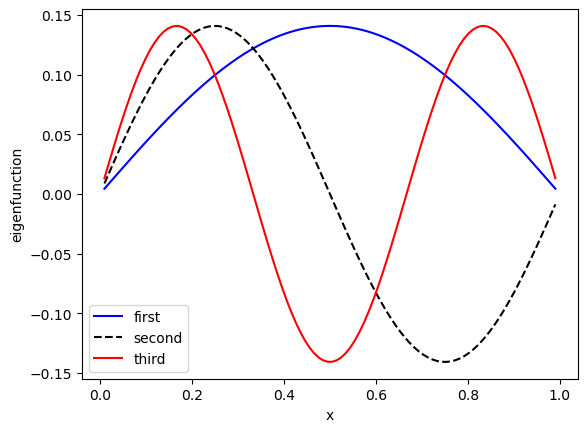

PyObject <matplotlib.legend.Legend object at 0x7fb25eff88b0>

In [5]:
x = (1:N)*Δx
plot(x, X[:,end], "b-")
plot(x, X[:,end-1], "k--")
plot(x, X[:,end-2], "r-")
xlabel("x")
ylabel("eigenfunction")
legend(["first", "second", "third"])

As we might have hoped, these are *very good* approximations for the exact eigenfunctions $\sin(n\pi x/L)$ ($n=1,2,3$) of the second-derivative operator.

In contrast, if we look at one of the largest-$|\lambda|$ eigenvectors, we get something highly oscillatory that doesn't much resemble the corresponding eigenfunction of $\partial^2/\partial x^2$.  This eigenfunction oscillates in sign from one grid point to the next, and the finite-difference approximation is nothing like a derivative:

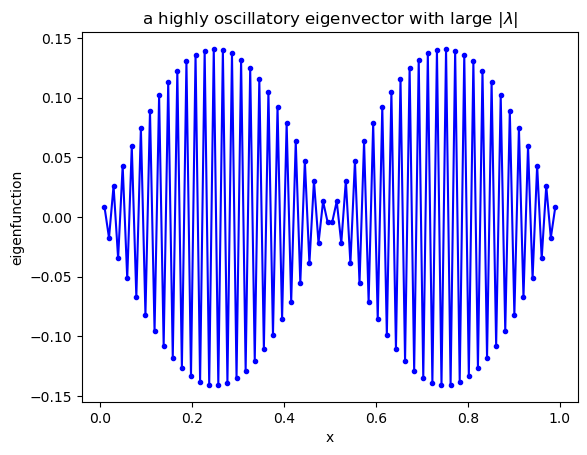

PyObject Text(0.5, 1.0, 'a highly oscillatory eigenvector with large $|\\lambda|$')

In [6]:
plot(x, X[:,2], "b.-")
xlabel("x")
ylabel("eigenfunction")
title(L"a highly oscillatory eigenvector with large $|\lambda|$")